In [2]:
# 电影情感分析
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 一、加载数据集

In [4]:
#  1. import datasetr
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(path = '/home/sally/Sally/DataSets/imdb/imdb.npz', num_words=10000)

In [9]:
# 2. a look at the data
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]

1

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# 3. decoding the integer sequences back into sentences
# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

  90112/1641221 [>.............................] - ETA: 10:47

# 二、准备数据 -- 张量化

In [16]:
# 1. encoding the integer sequences into a binary matrix
def vectorize_sequences(sequence dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
# an encoded samplea
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
# 2. encoding the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# 三、构建网络

In [19]:
# 1. model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
# 2. configuring the optimizer
# 方式1 -- 直接配置
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [33]:
# 方式2 -- 使用optimizers
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 方式3 -- 使用lossses & metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# 四、 准备交叉验证数据集

In [23]:
x_val = x_train[: 10000]
partial_x_train = x_train[10000 :]

y_val = y_train[: 10000]
partial_y_train = y_train[10000 :]

# 五、训练模型

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 8s 514us/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.5020 - val_accuracy: 0.8632
Epoch 2/10
15000/15000 [==============================] - 4s 254us/step - loss: 0.0292 - accuracy: 0.9939 - val_loss: 0.4625 - val_accuracy: 0.8705
Epoch 3/10
15000/15000 [==============================] - 4s 263us/step - loss: 0.0216 - accuracy: 0.9961 - val_loss: 0.4969 - val_accuracy: 0.8693
Epoch 4/10
15000/15000 [==============================] - 4s 235us/step - loss: 0.0190 - accuracy: 0.9963 - val_loss: 0.5339 - val_accuracy: 0.8662
Epoch 5/10
15000/15000 [==============================] - 4s 255us/step - loss: 0.0150 - accuracy: 0.9972 - val_loss: 0.5604 - val_accuracy: 0.8715
Epoch 6/10
15000/15000 [==============================] - 4s 236us/step - loss: 0.0134 - accuracy: 0.9970 - val_loss: 0.5873 - val_accuracy: 0.8706
Epoch 7/10
15000/15000 [==============================] - 4s 2

In [25]:
# the history dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 六、画图观察损失函数和准确率变化情况

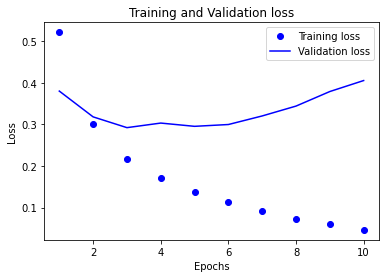

In [38]:
# 1. ploting the training and validation loss
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

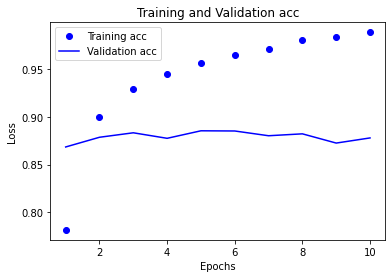

In [31]:
# 2. ploting the training and validation accuracy
plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 七、因为从上图来看，训练周期越长，准确率越低，所以减少训练次数，重新训练网络

In [35]:
# Re-training a model from scratch
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
15000/15000 [==============================] - 4s 280us/step - loss: 0.5321 - binary_accuracy: 0.7725
Epoch 2/4
15000/15000 [==============================] - 2s 167us/step - loss: 0.3242 - binary_accuracy: 0.9051
Epoch 3/4
15000/15000 [==============================] - 3s 169us/step - loss: 0.2328 - binary_accuracy: 0.9241
Epoch 4/4
25000/25000 [==============================] - 143s 6ms/step


[0.3189230384302139, 0.8695999979972839]

# 八、用模型做预测

In [36]:
model.predict(x_test)

array([[0.24315092],
       [0.9938015 ],
       [0.45649812],
       ...,
       [0.07250687],
       [0.08122474],
       [0.37288737]], dtype=float32)

# 九、构建其他网络做练习

In [45]:
# 1. 一层网络和三层
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history2 = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

history2.history.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 296us/step - loss: 0.5188 - binary_accuracy: 0.7775 - val_loss: 0.4062 - val_binary_accuracy: 0.8389
Epoch 2/4
15000/15000 [==============================] - 4s 287us/step - loss: 0.2910 - binary_accuracy: 0.9014 - val_loss: 0.2903 - val_binary_accuracy: 0.8898
Epoch 3/4
15000/15000 [==============================] - 4s 238us/step - loss: 0.2074 - binary_accuracy: 0.9294 - val_loss: 0.2792 - val_binary_accuracy: 0.8897
Epoch 4/4
15000/15000 [==============================] - 4s 240us/step - loss: 0.1616 - binary_accuracy: 0.9432 - val_loss: 0.2819 - val_binary_accuracy: 0.8894


dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [46]:
acc2 = history2.history['binary_accuracy']
val_acc2 = history2.history['val_binary_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

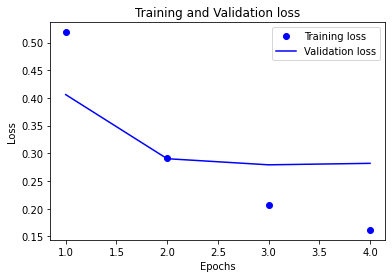

In [47]:
# 1. ploting the training and validation loss
epochs = range(1, len(acc2) + 1)

plt.plot(epochs, loss2, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss2, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

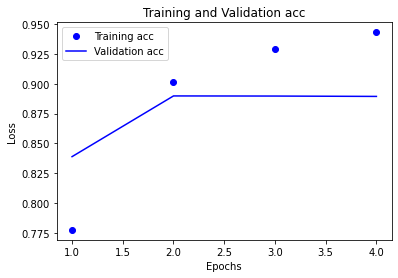

In [48]:
# ploting the training and validation accuracy
plt.clf()

plt.plot(epochs, acc2, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc2, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 2. 使用更小的网络
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history2 = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

history2.history.keys()

In [ ]:
# 绘制损失函数图像
# TODO
# 可以发现更小的网络，过拟合的时机越晚

In [ ]:
# 2. 使用更大的网络
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history2 = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

history2.history.keys()

In [ ]:
# 绘制损失函数图像
# TODO
# 可以发现更大的网络，效果比16的网络还差，几乎一轮之后就过拟合

# 十、 增加权重正则化项

In [ ]:
# Adding L2 weight regularizers to our model
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
# 绘制损失函数图像
# TODO
# 可以发现增加惩罚项之后的网络，不容易出现过拟合

In [ ]:
# Different weight regularizers available in Keras
from keras import regularizers

# L1 regularization 
regularizers.l1(0.001)

# L1 and L2 regularizers at the same time
regularizers.l1_l2(l1 = 0.001, l2 = 0.001)

# 十一、 增加丢弃  -- Adding dropout

In [ ]:
# 1. Dropout implementation: dropping out units at training time
layer_output *= np.randint(0, high = 2, size = layer_output.shape)

In [ ]:
# 2. Dropout implementation: test-time rescaling
# 测试集上要减半
layer_output *= 0.5

In [ ]:
# 3. Alternative implementation of Dropout
layer_output *= np.randint(0, high = 2, size = layer_output.shape)
# scaling up on test
layer_output /= 0.5

In [ ]:
# 4. Using Dropout in Keras
model.add(layers.Dropout(0.5))

In [ ]:
# 5. Adding Dropout to our IMDB network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# 绘制损失函数图像
# TODO
# 可以发现增加Dropout之后的网络，也不容易出现过拟合【但和正则化相比，效果差一些】

# 十二、 防止过拟合的方式

In [5]:
# 1. Getting more training data
# 2. Reducing the capacity of the network
# 3. Adding weight regularization
# 4. Adding dropout